In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time

# Import functions/classes for data splitting and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_absolute_error, classification_report

# Import data preprocessing tools
from sklearn.preprocessing import MinMaxScaler

# Import feature selection techniques
from sklearn.feature_selection import RFE

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Data reading

In [2]:
# Load data from a CSV file into a pandas DataFrame
data = pd.read_csv('full_data_flightdelay_homogeneous.csv')

# Display the first few rows of the DataFrame
data.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,...,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,...,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,...,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,...,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,...,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [3]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

# Missing value checking

In [4]:
# Calculate the number of missing values in each column
missing_values_count = data.isna().sum()

# Display the counts of missing values for each column
print(missing_values_count)

MONTH                            0
DAY_OF_WEEK                      0
DEP_DEL15                        0
DEP_TIME_BLK                     0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
LATITUDE                         0
LONGITUDE                        0
PREVIOUS_AIRPORT                 0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
dtype: int64


In [5]:
# Calculate the total number of missing values in the entire DataFrame
total_missing_values = data.isna().sum().sum()

# Display the total count of missing values
print(total_missing_values)

0


# Data overview

In [6]:
# Generate descriptive statistics for numerical columns and transpose the result
descriptive_stats = data.describe().T

# Display the transposed descriptive statistics
descriptive_stats

,count,mean,std,min,25%,50%,75%,max
MONTH,1800000.0,3.294008e+00,2.357582e+00,1.000000,1.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00
DAY_OF_WEEK,1800000.0,3.918581e+00,1.977897e+00,1.000000,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
DEP_DEL15,1800000.0,5.000000e-01,5.000001e-01,0.000000,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
DISTANCE_GROUP,1800000.0,3.865207e+00,2.387380e+00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00,1.100000e+01
SEGMENT_NUMBER,1800000.0,3.163912e+00,1.754791e+00,1.000000,2.000000e+00,3.000000e+00,4.000000e+00,1.500000e+01
CONCURRENT_FLIGHTS,1800000.0,2.792447e+01,2.071932e+01,1.000000,1.100000e+01,2.300000e+01,3.800000e+01,1.090000e+02
NUMBER_OF_SEATS,1800000.0,1.344216e+02,4.648333e+01,44.000000,9.000000e+01,1.430000e+02,1.720000e+02,3.370000e+02
AIRPORT_FLIGHTS_MONTH,1800000.0,1.265846e+04,8.398980e+03,1100.000000,5.629000e+03,1.150000e+04,1.772500e+04,3.525600e+04
AIRLINE_FLIGHTS_MONTH,1800000.0,6.030820e+04,3.338628e+04,5582.000000,2.420400e+04,6.727300e+04,8.414200e+04,1.177280e+05
AIRLINE_AIRPORT_FLIGHTS_MONTH,1800000.0,3.460170e+03,4.130884e+03,1.000000,6.870000e+02,2.374000e+03,4.621000e+03,2.183700e+04


# Checking for correlation to Delay

In [7]:
# Calculate the correlation between 'DEP_DEL15' and other columns, then sort in descending order
correlation = data.corr()['DEP_DEL15'].sort_values(ascending=False)

# Convert the correlation Series to a dictionary
correlation = dict(correlation)

# Display the dictionary of correlations
correlation

{'DEP_DEL15': 1.0,
 'MONTH': 0.6818409946756656,
 'TMAX': 0.46268815781141864,
 'SEGMENT_NUMBER': 0.17619800585620826,
 'PRCP': 0.10795646853423063,
 'AIRLINE_FLIGHTS_MONTH': 0.08347182043065618,
 'AIRPORT_FLIGHTS_MONTH': 0.06833123970612442,
 'AIRLINE_AIRPORT_FLIGHTS_MONTH': 0.034240164814195756,
 'LONGITUDE': 0.02310964496049418,
 'DISTANCE_GROUP': 0.01980112050587317,
 'CONCURRENT_FLIGHTS': 0.018207650004022406,
 'LATITUDE': 0.01755962802789539,
 'DAY_OF_WEEK': 0.013517450497152927,
 'NUMBER_OF_SEATS': 0.013483655637696155,
 'FLT_ATTENDANTS_PER_PASS': 0.01108868603363913,
 'PLANE_AGE': 0.007047365389451535,
 'AVG_MONTHLY_PASS_AIRPORT': 0.003078476307401366,
 'AVG_MONTHLY_PASS_AIRLINE': -0.0010069409932715074,
 'AWND': -0.0021994902706746066,
 'SNOW': -0.017772500269065017,
 'GROUND_SERV_PER_PASS': -0.02397417927019624,
 'SNWD': -0.06810342489840361}

In [8]:
# Create a copy of the correlation dictionary
corr_matrix = correlation.copy()

# Initialize a list to store column names to be dropped
cols_to_drop = []

# Iterate over the columns in the correlation dictionary
for key in corr_matrix:
    value = corr_matrix[key]
    
    # Check if the absolute value of the correlation is less than 0.05 or if value is None
    if (abs(value) < 0.05) or pd.isnull(value):
        cols_to_drop.append(key)

# Drop the columns from the DataFrame
data = data.drop(cols_to_drop, axis=1)

# Display the list of columns to be dropped
cols_to_drop

['AIRLINE_AIRPORT_FLIGHTS_MONTH',
 'LONGITUDE',
 'DISTANCE_GROUP',
 'CONCURRENT_FLIGHTS',
 'LATITUDE',
 'DAY_OF_WEEK',
 'NUMBER_OF_SEATS',
 'FLT_ATTENDANTS_PER_PASS',
 'PLANE_AGE',
 'AVG_MONTHLY_PASS_AIRPORT',
 'AVG_MONTHLY_PASS_AIRLINE',
 'AWND',
 'SNOW',
 'GROUND_SERV_PER_PASS']

In [9]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame
data_shape = data.shape

# Display the dimensions
print(data_shape)

(1800000, 12)


In [10]:
# Import the LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Define a function to clean and encode categorical labels
def clean_labels_encoder(list_of_labels, df):
    for label in list_of_labels:
        # Apply the LabelEncoder to each categorical column
        df[label] = le.fit_transform(df[label])
    return df

# List of categorical labels to be encoded
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']

# Call the clean_labels_encoder function to encode categorical labels in the DataFrame
data = clean_labels_encoder(list_of_labels, data)

# Display the first few rows of the updated DataFrame
data.head()

,MONTH,DEP_DEL15,DEP_TIME_BLK,SEGMENT_NUMBER,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNWD,TMAX
0,1,0,3,1,14,13056,107363,44,216,0.0,0.0,65.0
1,1,0,2,1,6,13056,73508,44,216,0.0,0.0,65.0
2,1,0,1,1,6,13056,73508,44,216,0.0,0.0,65.0
3,1,0,1,1,6,13056,73508,44,216,0.0,0.0,65.0
4,1,0,0,1,15,13056,15023,44,216,0.0,0.0,65.0


In [11]:
# Check the data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800000 entries, 0 to 1799999
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MONTH                  int64  
 1   DEP_DEL15              int64  
 2   DEP_TIME_BLK           int32  
 3   SEGMENT_NUMBER         int64  
 4   CARRIER_NAME           int32  
 5   AIRPORT_FLIGHTS_MONTH  int64  
 6   AIRLINE_FLIGHTS_MONTH  int64  
 7   DEPARTING_AIRPORT      int32  
 8   PREVIOUS_AIRPORT       int32  
 9   PRCP                   float64
 10  SNWD                   float64
 11  TMAX                   float64
dtypes: float64(3), int32(4), int64(5)
memory usage: 137.3 MB


In [12]:
# Fill the missing values with mean
data.fillna(data.mean(), inplace=True)

# Show correlation
data.corr()

,MONTH,DEP_DEL15,DEP_TIME_BLK,SEGMENT_NUMBER,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,DEPARTING_AIRPORT,PREVIOUS_AIRPORT,PRCP,SNWD,TMAX
MONTH,1.000000,0.681841,0.175822,0.149307,0.008007,0.112468,0.082950,-0.012145,-0.025931,0.079968,-0.135256,0.674452
DEP_DEL15,0.681841,1.000000,0.218007,0.176198,0.036173,0.068331,0.083472,-0.005653,-0.028493,0.107956,-0.068103,0.462688
DEP_TIME_BLK,0.175822,0.218007,1.000000,0.685484,0.022698,0.108877,0.035732,-0.048636,-0.066602,0.021305,-0.032791,0.150210
SEGMENT_NUMBER,0.149307,0.176198,0.685484,1.000000,0.086529,0.038220,0.070835,-0.031220,-0.115422,-0.000232,-0.027501,0.115568
CARRIER_NAME,0.008007,0.036173,0.022698,0.086529,1.000000,-0.144639,0.212316,0.136524,0.063709,-0.017191,-0.013835,0.008541
AIRPORT_FLIGHTS_MONTH,0.112468,0.068331,0.108877,0.038220,-0.144639,1.000000,-0.000456,-0.424963,0.013729,0.011730,-0.055585,0.075565
AIRLINE_FLIGHTS_MONTH,0.082950,0.083472,0.035732,0.070835,0.212316,-0.000456,1.000000,0.027979,0.004369,-0.000163,-0.039679,0.099155
DEPARTING_AIRPORT,-0.012145,-0.005653,-0.048636,-0.031220,0.136524,-0.424963,0.027979,1.000000,0.013185,-0.030962,-0.078767,0.027180
PREVIOUS_AIRPORT,-0.025931,-0.028493,-0.066602,-0.115422,0.063709,0.013729,0.004369,0.013185,1.000000,-0.014003,0.004188,-0.024689
PRCP,0.079968,0.107956,0.021305,-0.000232,-0.017191,0.011730,-0.000163,-0.030962,-0.014003,1.000000,-0.019554,0.041885


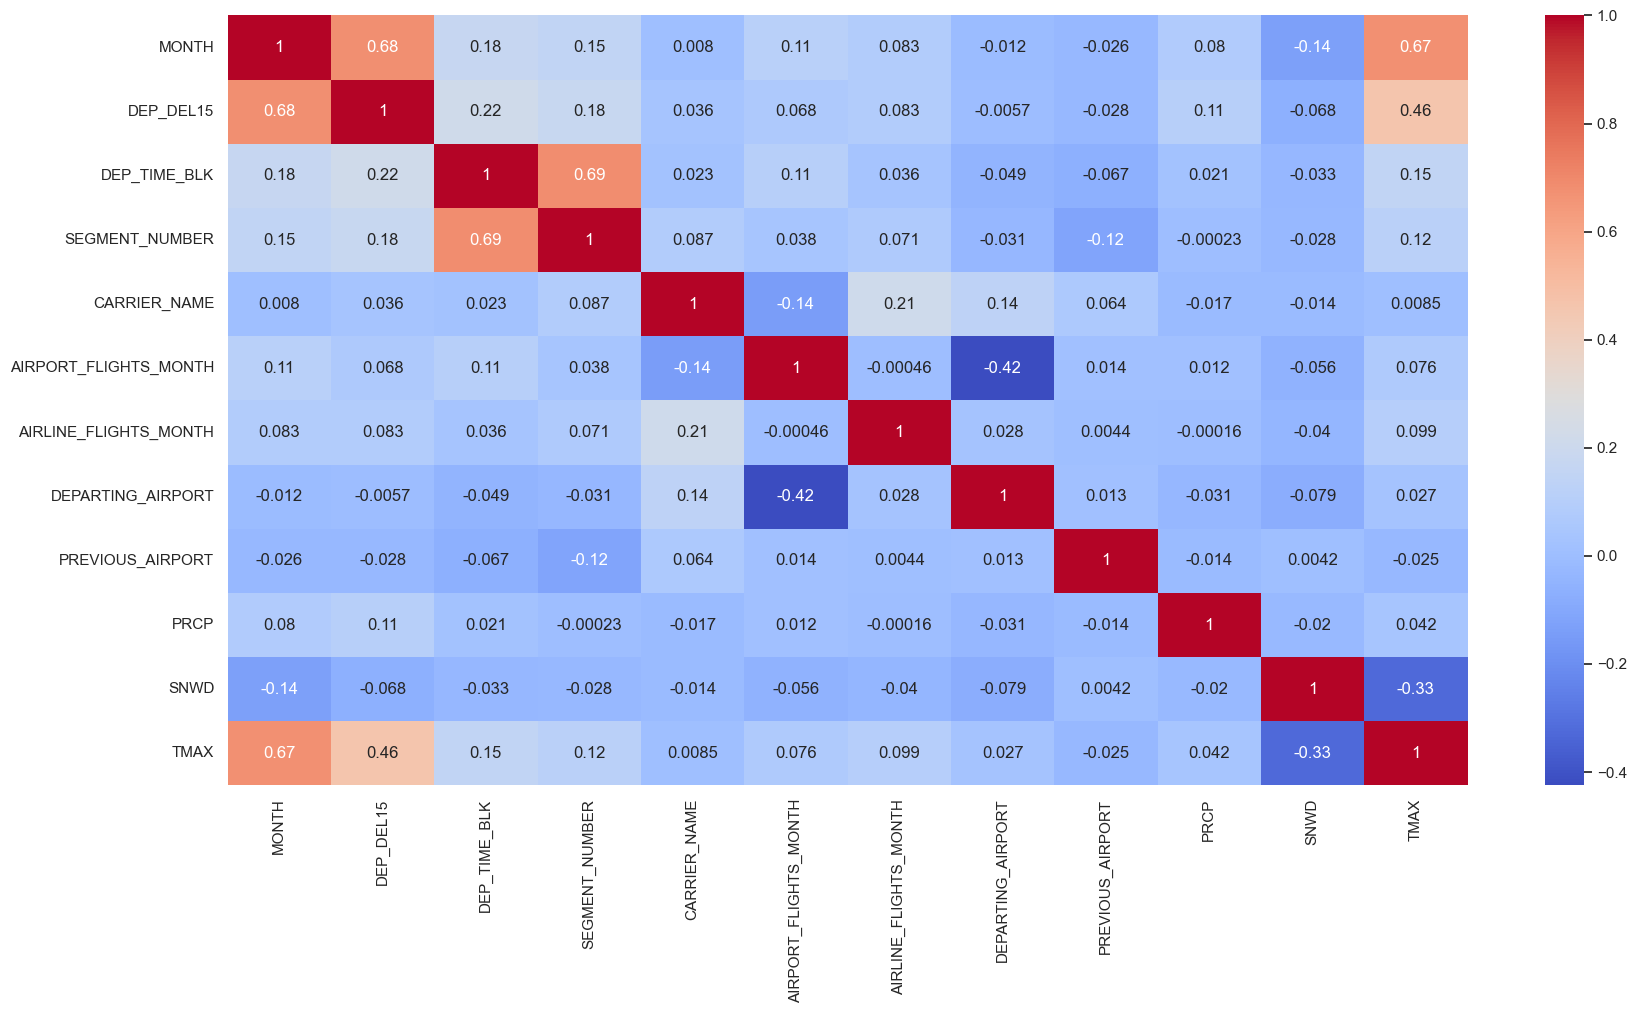

In [13]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to show the correlation heatmap
def show_correlation(df):
    # Set the size of the figure
    plt.figure(figsize=(20, 10))
    
    # Set style and context for the plot
    sns.set(style='whitegrid', context='notebook')
    
    # Generate the heatmap of the correlation matrix
    sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')
    
    # Display the plot
    plt.show()

# Call the show_correlation function to visualize the correlation heatmap
show_correlation(data)

# Data normalization

In [14]:
# Shuffle the rows of the DataFrame
data = shuffle(data)

# Import the MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the data and transform it
scaled = scaler.fit_transform(data)

In [15]:
# Create a new DataFrame with scaled values
data_scaled = pd.DataFrame(scaled, index=data.index, columns=data.columns)

In [16]:
# Extract input features (X) and target variable (Y)
X = data_scaled.drop(['DEP_DEL15'], axis=1)
Y = data_scaled['DEP_DEL15']

In [17]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X_train: training input features
# X_test: testing input features
# y_train: training target variable
# y_test: testing target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=4)

# Display the shape of the training input features
print(X_train.shape)

(1206000, 11)


In [18]:
labels = ['False','True']

# Train and Test

In [19]:
# Build a classification model using various supervised machine 
# learning models and check which model gives you the best accuracy

# use the following models
# 1. Logistic Regression
# 2. Decision Tree
# 3. GaussianNB
# 4. MLPClassifier
# 5. RandomForestClassifier

In [20]:
# Import necessary libraries for metrics and visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define a function to print a separator line
def separator(count=50):
    print('-' * count)

# Define the function to train the model and print accuracy metrics
def train_model_and_print_accuracy(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Calculate and print train and test scores
    scoreTrain = model.score(X_train, y_train)
    scoreTest = model.score(X_test, y_test)

    # Predict the test data
    predict_test = model.predict(X_test)

    # Calculate confusion matrix and classification report
    cm_result = confusion_matrix(y_test, predict_test)
    cr_result = classification_report(y_test, predict_test)

    # Get the model name
    model_name = str(model).split('(')[0]

    # Print model name in bold
    print('\033[1m' + model_name + '\033[0m')

    # Print separator
    separator()
    print('Train Score for ' + model_name + ':', scoreTrain)
    separator()
    print('Test Score for ' + model_name + ':', scoreTest)
    separator()
    print('Confusion Matrix for ' + model_name + ' for test:\n', cm_result)
    separator()
    print('Classification Report for ' + model_name + ' for test:\n', str(cr_result))
    separator()

    # Plot confusion matrix
    model_confusion_matrix = confusion_matrix(y_test, predict_test)
    print('Confusion Matrix:\n', str(model_confusion_matrix))
    separator()
    ax = sns.heatmap(model_confusion_matrix, annot=True, cmap='Oranges')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    labels = ['Class 0', 'Class 1']  # Modify according to your class labels
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()

    separator()

LogisticRegression
--------------------------------------------------
Train Score for LogisticRegression: 0.840879767827529
--------------------------------------------------
Test Score for LogisticRegression: 0.8413080808080808
--------------------------------------------------
Confusion Matrix for LogisticRegression for test:
 [[268501  27978]
 [ 66285 231236]]
--------------------------------------------------
Classification Report for LogisticRegression for test:
               precision    recall  f1-score   support

         0.0       0.80      0.91      0.85    296479
         1.0       0.89      0.78      0.83    297521

    accuracy                           0.84    594000
   macro avg       0.85      0.84      0.84    594000
weighted avg       0.85      0.84      0.84    594000

--------------------------------------------------
Confusion Matrix:
 [[268501  27978]
 [ 66285 231236]]
--------------------------------------------------


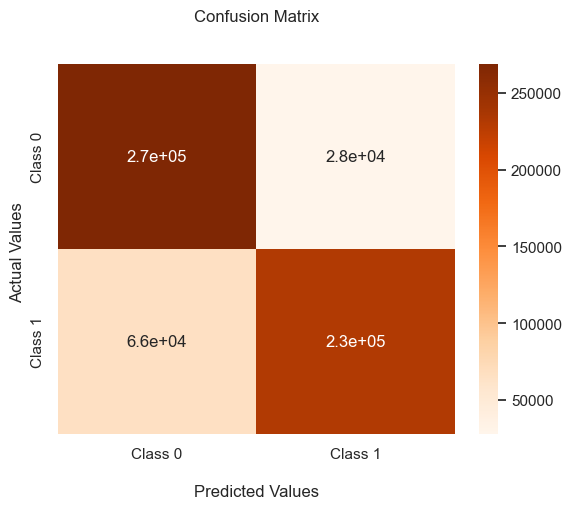

--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------
Train Score for DecisionTreeClassifier: 0.8509618573797678
--------------------------------------------------
Test Score for DecisionTreeClassifier: 0.8517508417508417
--------------------------------------------------
Confusion Matrix for DecisionTreeClassifier for test:
 [[289373   7106]
 [ 80954 216567]]
--------------------------------------------------
Classification Report for DecisionTreeClassifier for test:
               precision    recall  f1-score   support

         0.0       0.78      0.98      0.87    296479
         1.0       0.97      0.73      0.83    297521

    accuracy                           0.85    594000
   macro avg       0.87      0.85      0.85    594000
weighted avg       0.87      0.85      0.85    594000

--------------------------------------------------
Confusion Matrix:
 [[289373   7106]
 [ 80954 216567]]
-----------------------

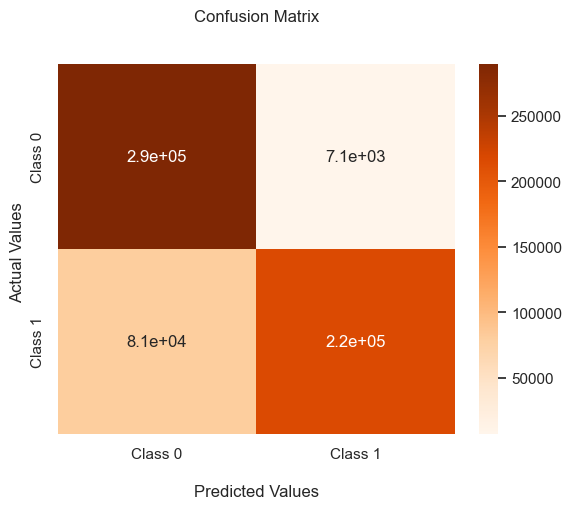

--------------------------------------------------
GaussianNB
--------------------------------------------------
Train Score for GaussianNB: 0.8310082918739635
--------------------------------------------------
Test Score for GaussianNB: 0.831925925925926
--------------------------------------------------
Confusion Matrix for GaussianNB for test:
 [[267843  28636]
 [ 71200 226321]]
--------------------------------------------------
Classification Report for GaussianNB for test:
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    296479
         1.0       0.89      0.76      0.82    297521

    accuracy                           0.83    594000
   macro avg       0.84      0.83      0.83    594000
weighted avg       0.84      0.83      0.83    594000

--------------------------------------------------
Confusion Matrix:
 [[267843  28636]
 [ 71200 226321]]
--------------------------------------------------


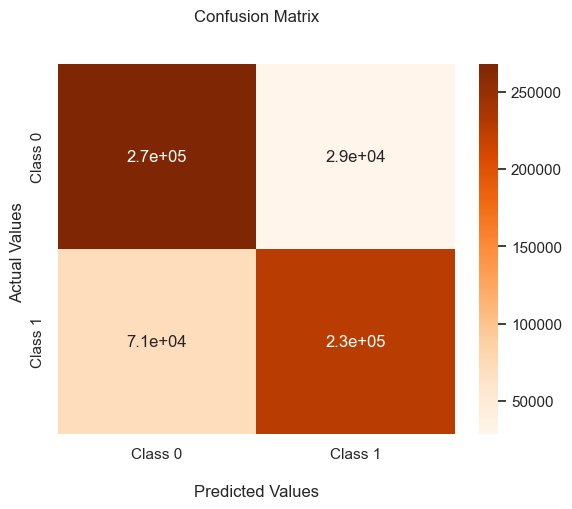

--------------------------------------------------
RandomForestClassifier
--------------------------------------------------
Train Score for RandomForestClassifier: 0.8475149253731343
--------------------------------------------------
Test Score for RandomForestClassifier: 0.8485235690235691
--------------------------------------------------
Confusion Matrix for RandomForestClassifier for test:
 [[293206   3273]
 [ 86704 210817]]
--------------------------------------------------
Classification Report for RandomForestClassifier for test:
               precision    recall  f1-score   support

         0.0       0.77      0.99      0.87    296479
         1.0       0.98      0.71      0.82    297521

    accuracy                           0.85    594000
   macro avg       0.88      0.85      0.85    594000
weighted avg       0.88      0.85      0.85    594000

--------------------------------------------------
Confusion Matrix:
 [[293206   3273]
 [ 86704 210817]]
-----------------------

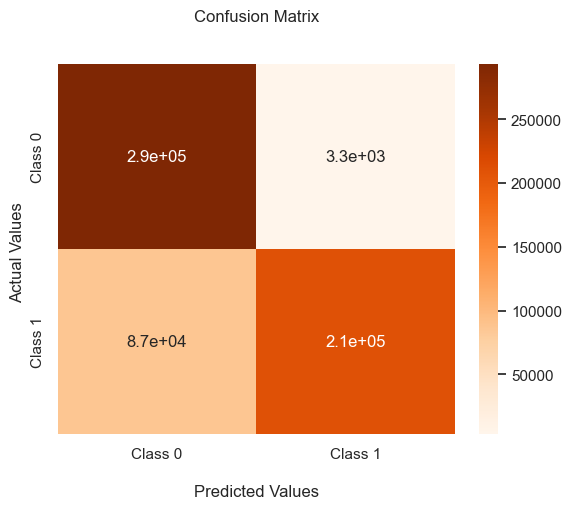

--------------------------------------------------
MLPClassifier
--------------------------------------------------
Train Score for MLPClassifier: 0.8625331674958541
--------------------------------------------------
Test Score for MLPClassifier: 0.8625488215488215
--------------------------------------------------
Confusion Matrix for MLPClassifier for test:
 [[281357  15122]
 [ 66524 230997]]
--------------------------------------------------
Classification Report for MLPClassifier for test:
               precision    recall  f1-score   support

         0.0       0.81      0.95      0.87    296479
         1.0       0.94      0.78      0.85    297521

    accuracy                           0.86    594000
   macro avg       0.87      0.86      0.86    594000
weighted avg       0.87      0.86      0.86    594000

--------------------------------------------------
Confusion Matrix:
 [[281357  15122]
 [ 66524 230997]]
--------------------------------------------------


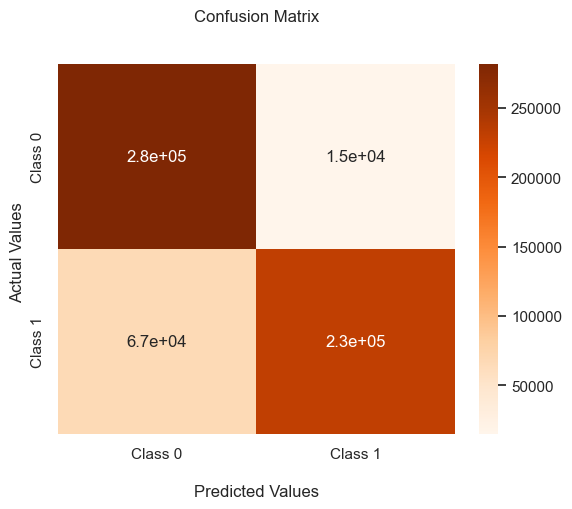

--------------------------------------------------


In [21]:
# using logistic regression
# 1. Logistic Regression
# 2. Decision Tree
# 3. GaussianNB
# 4. MLPClassifier
# 5. RandomForestClassifier

# Import necessary classifier classes
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Initialize the classifiers
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=3)
gnb = GaussianNB()
mlp = MLPClassifier(random_state=1, max_iter=300)
rfc = RandomForestClassifier(max_depth=3)

# List of models
models = [log_reg, dt, gnb, rfc, mlp]

# Train each model and print accuracy metrics
for model in models:
    train_model_and_print_accuracy(model, X_train, y_train, X_test, y_test)

In [22]:
# conclusion before PCA - principal component analysis
# show that best modal is MLPClassifier with 0.86 accuracy (approx)

In [23]:
# Now use PCA to reduce the dimensionality of the data and
# retrain the models to see what impacts it has on your model in terms of accuracy.
# keep in mind that many times doing PCA can actually decrease the accuracy of your model
# but computation is much lighter and that's trade off you need to consider while build models in real life

In [24]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA with the explained variance threshold of 0.95
pca = PCA(0.95)

# Apply PCA transformation to the input features
x_pca = pca.fit_transform(X)

# Display the shape of the transformed data
print(x_pca.shape)

(1800000, 7)


In [25]:
# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.3, random_state=42)

************************* PCA *************************
LogisticRegression
--------------------------------------------------
Train Score for LogisticRegression: 0.8334039682539682
--------------------------------------------------
Test Score for LogisticRegression: 0.8330814814814815
--------------------------------------------------
Confusion Matrix for LogisticRegression for test:
 [[244487  25753]
 [ 64383 205377]]
--------------------------------------------------
Classification Report for LogisticRegression for test:
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    270240
         1.0       0.89      0.76      0.82    269760

    accuracy                           0.83    540000
   macro avg       0.84      0.83      0.83    540000
weighted avg       0.84      0.83      0.83    540000

--------------------------------------------------
Confusion Matrix:
 [[244487  25753]
 [ 64383 205377]]
--------------------------------------

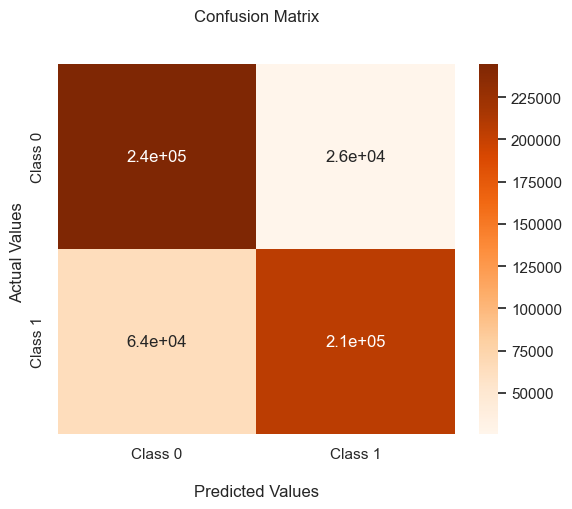

--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------
Train Score for DecisionTreeClassifier: 0.8025388888888889
--------------------------------------------------
Test Score for DecisionTreeClassifier: 0.801637037037037
--------------------------------------------------
Confusion Matrix for DecisionTreeClassifier for test:
 [[244370  25870]
 [ 81246 188514]]
--------------------------------------------------
Classification Report for DecisionTreeClassifier for test:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82    270240
         1.0       0.88      0.70      0.78    269760

    accuracy                           0.80    540000
   macro avg       0.81      0.80      0.80    540000
weighted avg       0.81      0.80      0.80    540000

--------------------------------------------------
Confusion Matrix:
 [[244370  25870]
 [ 81246 188514]]
------------------------

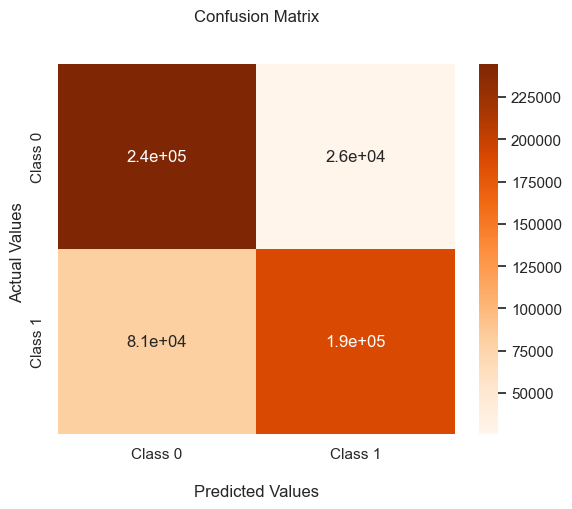

--------------------------------------------------
GaussianNB
--------------------------------------------------
Train Score for GaussianNB: 0.8232833333333334
--------------------------------------------------
Test Score for GaussianNB: 0.8225740740740741
--------------------------------------------------
Confusion Matrix for GaussianNB for test:
 [[251730  18510]
 [ 77300 192460]]
--------------------------------------------------
Classification Report for GaussianNB for test:
               precision    recall  f1-score   support

         0.0       0.77      0.93      0.84    270240
         1.0       0.91      0.71      0.80    269760

    accuracy                           0.82    540000
   macro avg       0.84      0.82      0.82    540000
weighted avg       0.84      0.82      0.82    540000

--------------------------------------------------
Confusion Matrix:
 [[251730  18510]
 [ 77300 192460]]
--------------------------------------------------


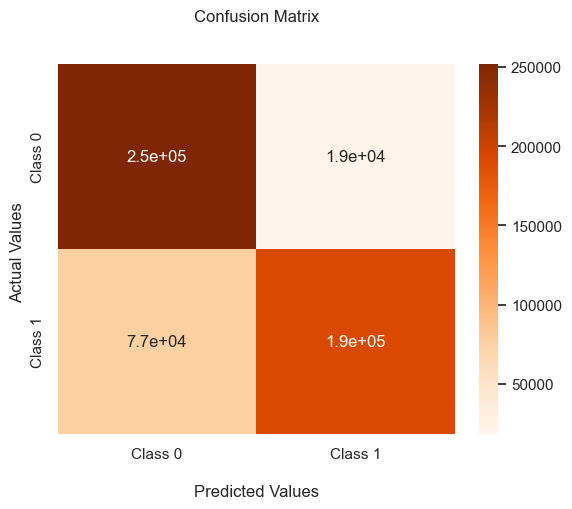

--------------------------------------------------
RandomForestClassifier
--------------------------------------------------
Train Score for RandomForestClassifier: 0.7998611111111111
--------------------------------------------------
Test Score for RandomForestClassifier: 0.799074074074074
--------------------------------------------------
Confusion Matrix for RandomForestClassifier for test:
 [[243621  26619]
 [ 81881 187879]]
--------------------------------------------------
Classification Report for RandomForestClassifier for test:
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82    270240
         1.0       0.88      0.70      0.78    269760

    accuracy                           0.80    540000
   macro avg       0.81      0.80      0.80    540000
weighted avg       0.81      0.80      0.80    540000

--------------------------------------------------
Confusion Matrix:
 [[243621  26619]
 [ 81881 187879]]
------------------------

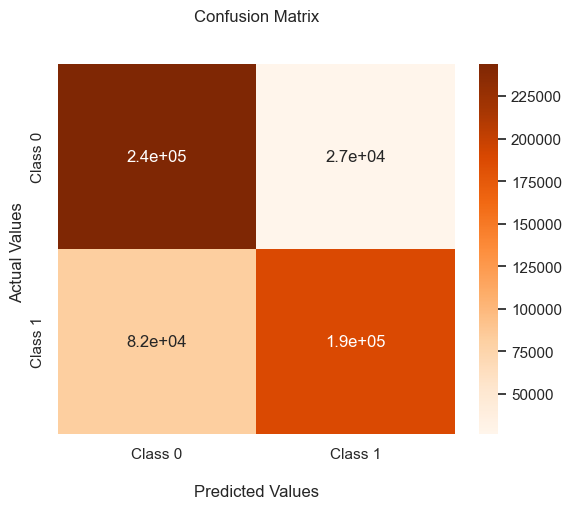

--------------------------------------------------
MLPClassifier
--------------------------------------------------
Train Score for MLPClassifier: 0.8563801587301587
--------------------------------------------------
Test Score for MLPClassifier: 0.8552351851851852
--------------------------------------------------
Confusion Matrix for MLPClassifier for test:
 [[260825   9415]
 [ 68758 201002]]
--------------------------------------------------
Classification Report for MLPClassifier for test:
               precision    recall  f1-score   support

         0.0       0.79      0.97      0.87    270240
         1.0       0.96      0.75      0.84    269760

    accuracy                           0.86    540000
   macro avg       0.87      0.86      0.85    540000
weighted avg       0.87      0.86      0.85    540000

--------------------------------------------------
Confusion Matrix:
 [[260825   9415]
 [ 68758 201002]]
--------------------------------------------------


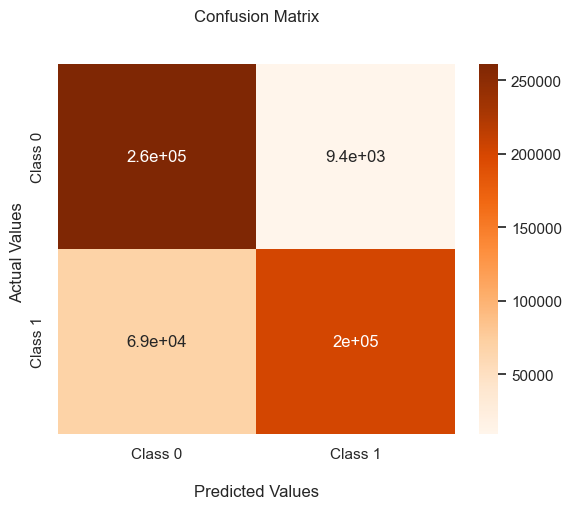

--------------------------------------------------


In [26]:
# now retrain the models
print('*'*25, 'PCA', '*'*25)
for model in models:
    train_model_and_print_accuracy(model, X_train, y_train, X_test, y_test)